# Explore here

In [45]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, make_scorer

import matplotlib.pyplot as plt

import joblib


In [2]:
# df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")

# df.to_csv("../data/raw/raw_data.csv")

df = pd.read_csv("../data/raw/raw_data.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
# We are only interested in Latitude, Longitude and MedInc columns
data = df[['Latitude', 'Longitude', 'MedInc']]

# Split the dataset into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
# Initialize KMeans model
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)

# Fit the model on the training data
kmeans.fit(train_data)

# Predict the cluster for each house in the training data
train_data['Cluster'] = kmeans.labels_

# Predict the cluster for each house in the test data
test_data['Cluster'] = kmeans.predict(test_data[['Latitude', 'Longitude', 'MedInc']])

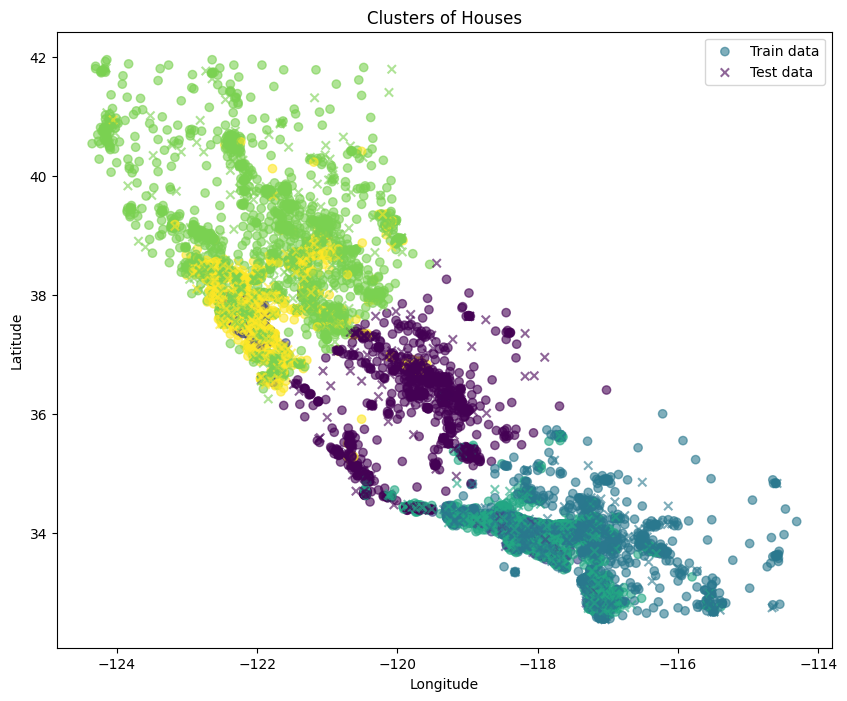

In [6]:
# Plotting the clusters
plt.figure(figsize=(10, 8))
plt.scatter(train_data['Longitude'], train_data['Latitude'], c=train_data['Cluster'], cmap='viridis', marker='o', alpha=0.6, label='Train data')
plt.scatter(test_data['Longitude'], test_data['Latitude'], c=test_data['Cluster'], cmap='viridis', marker='x', alpha=0.6, label='Test data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters of Houses')
plt.legend()
plt.show()

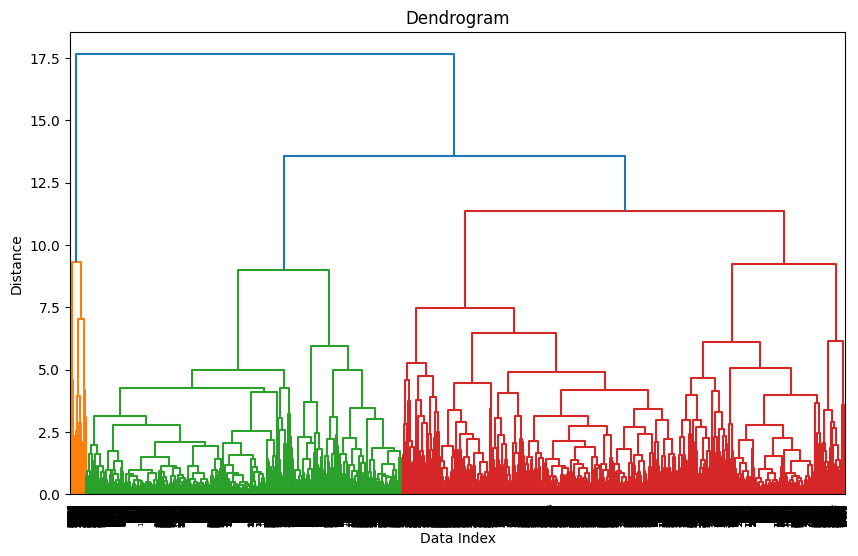

In [7]:
# Calculate the similarity matrix between clusters
Z = linkage(data, method = "complete")

# Display the dendrogram
plt.figure(figsize = (10, 6))

dendrogram(Z)

plt.title("Dendrogram")
plt.xlabel("Data Index")
plt.ylabel("Distance")
plt.show()

In [ ]:
# Save the KMeans model
joblib.dump(kmeans, 'kmeans_model.pkl')

['rf_model.pkl']

In [8]:
# Calculate the silhouette score for the training data
silhouette_train = silhouette_score(train_data[['Latitude', 'Longitude', 'MedInc']], train_data['Cluster'])
print(f'Silhouette Score for Training Data: {silhouette_train}')

# Calculate the silhouette score for the test data
silhouette_test = silhouette_score(test_data[['Latitude', 'Longitude', 'MedInc']], test_data['Cluster'])
print(f'Silhouette Score for Test Data: {silhouette_test}')


Silhouette Score for Training Data: 0.40069020287880325
Silhouette Score for Test Data: 0.40131054188195314


The silhouette scores for both the training and test data are around 0.4, which indicates a moderate level of cluster separation.

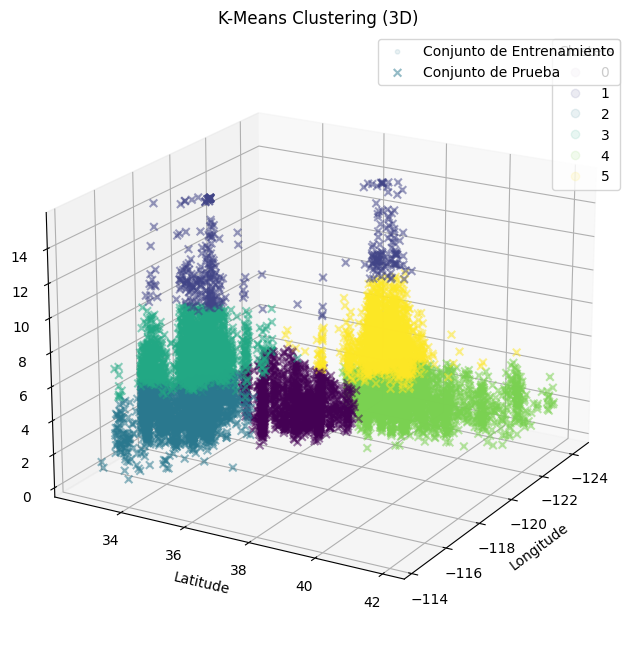

In [9]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot para el conjunto completo (X_train_sc)
scatter = ax.scatter(train_data['Longitude'], train_data['Latitude'], train_data['MedInc'],
                     c=train_data['Cluster'], cmap='viridis', s=10, label='Conjunto de Entrenamiento', alpha=0.1)

# Scatter plot para el conjunto de prueba (X_test_sc)
# Asumiendo que X_test_sc tiene las mismas columnas y una columna 'cluster' para el color
scatter_test = ax.scatter(train_data['Longitude'], train_data['Latitude'], train_data['MedInc'],
                          c=train_data['Cluster'], cmap='viridis', marker='x', s=30, label='Conjunto de Prueba', alpha=0.5)

ax.set_title('K-Means Clustering (3D)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('MedInc')

# Ángulo de vista
ax.view_init(elev=20, azim=30)

# Leyenda
legend = ax.legend(*scatter.legend_elements(), title='Clusters')
ax.add_artist(legend)

# Agregar leyenda para el conjunto de prueba
plt.legend(loc='upper right')
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_train_data = scaler.fit_transform(train_data[['Latitude', 'Longitude', 'MedInc']])
scaled_test_data = scaler.transform(test_data[['Latitude', 'Longitude', 'MedInc']])

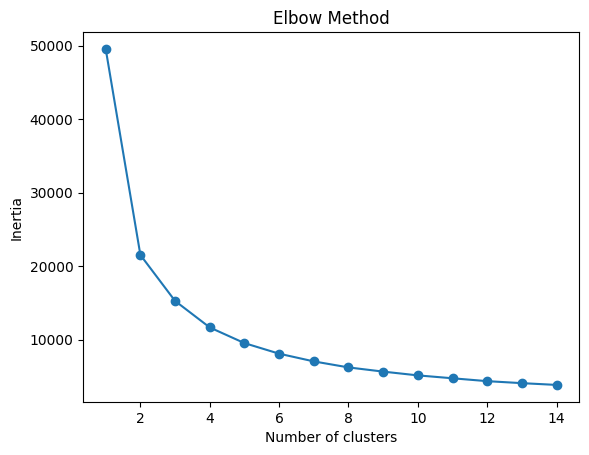

In [17]:
inertia = []
for n in range(1, 15):
    kmeans = KMeans(n_clusters=n, random_state=42, n_init=10)
    kmeans.fit(scaled_train_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 15), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [40]:
optimal_clusters = 3 # This should be determined based on the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
kmeans.fit(scaled_train_data)

train_data['Cluster'] = kmeans.labels_
test_data['Cluster'] = kmeans.predict(scaled_test_data)

silhouette_train = silhouette_score(scaled_train_data, train_data['Cluster'])
silhouette_test = silhouette_score(scaled_test_data, test_data['Cluster'])
print(f'Silhouette Score for Training Data: {silhouette_train}')
print(f'Silhouette Score for Test Data: {silhouette_test}')

Silhouette Score for Training Data: 0.5154271169994596
Silhouette Score for Test Data: 0.5246685587211235


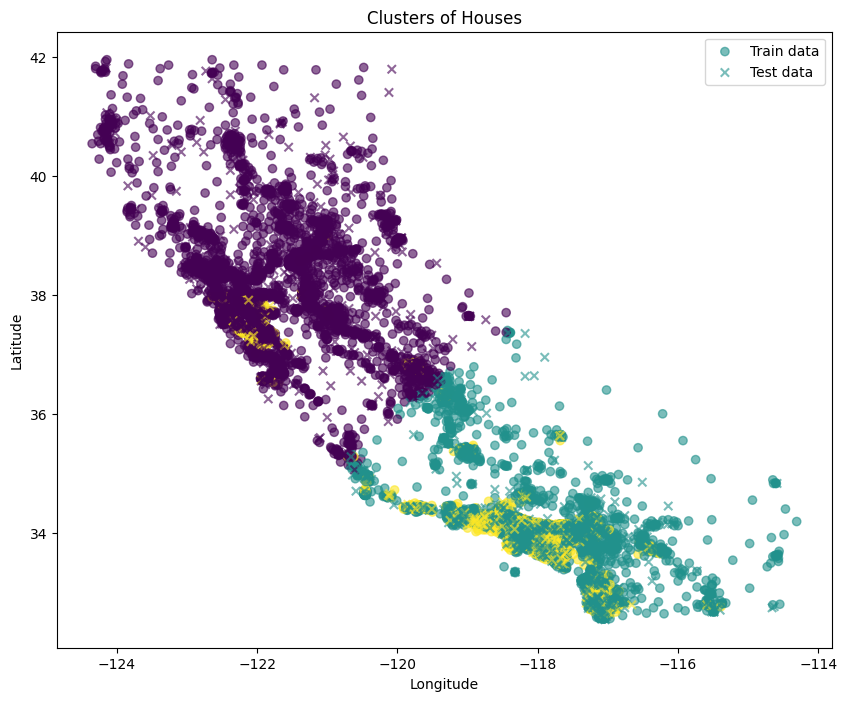

In [38]:
plt.figure(figsize=(10, 8))
plt.scatter(train_data['Longitude'], train_data['Latitude'], c=train_data['Cluster'], cmap='viridis', marker='o', alpha=0.6, label='Train data')
plt.scatter(test_data['Longitude'], test_data['Latitude'], c=test_data['Cluster'], cmap='viridis', marker='x', alpha=0.6, label='Test data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters of Houses')
plt.legend()
plt.show()

In [54]:
# Save the KMeans model again
joblib.dump(kmeans, '..\models\kmeans_model.pkl')

['..\\models\\kmeans_model.pkl']